# Cloud, HPC & QC Final Project

Riley Tuccio

## Info on Methods, Data and Project

### Dependent Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### Data Information

Data Source: https://www.kaggle.com/datasets/mrpantherson/dnd-5e-monsters

**What is DND?:** Dungeons and Dragons, also known as "DND" is a multi-player tabletop roleplaying game where a game master creates fictional adventures for the rest of the players to improvise stories off of. This works as as sandbox environment for campaigns that can last for months. A Game that was created in the 70s, there have been multiple additions of the guidebook, a book that contains rules and already created characters for the game master to build fictional stories off of. 

**What are DND Monsters?:** DND monsters are already created antagonists to create stakes in the game. The goal of campaigns is to defeat these monsters either in combot or in descilation. These monsters have gradually defined statistics, with some harder than others, and all having their own individual 

In [6]:
#url = "/scratch/ptolemy/users/rnt89/FinalProject/dnd_monsters.csv"
url = r"C:\Users\Riley\Downloads\ComputingLab_DSCI2022\FinalProject\dnd_monsters.csv"
dnd = pd.read_csv(url)

In [7]:
dnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       762 non-null    object 
 1   url        401 non-null    object 
 2   cr         761 non-null    object 
 3   type       762 non-null    object 
 4   size       762 non-null    object 
 5   ac         762 non-null    int64  
 6   hp         762 non-null    int64  
 7   speed      248 non-null    object 
 8   align      762 non-null    object 
 9   legendary  43 non-null     object 
 10  source     762 non-null    object 
 11  str        401 non-null    float64
 12  dex        401 non-null    float64
 13  con        401 non-null    float64
 14  int        401 non-null    float64
 15  wis        401 non-null    float64
 16  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(9)
memory usage: 101.3+ KB


In [8]:
dnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       762 non-null    object 
 1   url        401 non-null    object 
 2   cr         761 non-null    object 
 3   type       762 non-null    object 
 4   size       762 non-null    object 
 5   ac         762 non-null    int64  
 6   hp         762 non-null    int64  
 7   speed      248 non-null    object 
 8   align      762 non-null    object 
 9   legendary  43 non-null     object 
 10  source     762 non-null    object 
 11  str        401 non-null    float64
 12  dex        401 non-null    float64
 13  con        401 non-null    float64
 14  int        401 non-null    float64
 15  wis        401 non-null    float64
 16  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(9)
memory usage: 101.3+ KB


### Project Goals

The goal of this project is to determine an efficent classification machine learning model that can determine the size of a monster by its stats. Then after that, using unsupervised classification, to see if there are any clusters formed by monsters.

While Creating these models, the affects of variances in resources will be tested with the modeling to see how they affect accuracy and computing time.

### Methods

***Random Forests:***  Random Forests, an algorithm that makes many decision trees for classification, will be used to do the  model that determines size based on the other attributes of the variables. 

***SKlearn:*** Sklearn is a python module that has many machine learning tools in it's library. We'll use their random forest function along with others to determine train and test data.

***MultiProcessing:*** Multiprocessing has independent processes with shared memeory, and to understand how parameters of resources can be affected, Multiprocessing should be used. 

## Pre-Processing

### Dropping Nulls and Legendary column

In [9]:
dnd = dnd.drop(['legendary','speed'],axis=1)

In [10]:
dnd = dnd.dropna()

In [11]:
dnd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 760
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    401 non-null    object 
 1   url     401 non-null    object 
 2   cr      401 non-null    object 
 3   type    401 non-null    object 
 4   size    401 non-null    object 
 5   ac      401 non-null    int64  
 6   hp      401 non-null    int64  
 7   align   401 non-null    object 
 8   source  401 non-null    object 
 9   str     401 non-null    float64
 10  dex     401 non-null    float64
 11  con     401 non-null    float64
 12  int     401 non-null    float64
 13  wis     401 non-null    float64
 14  cha     401 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 50.1+ KB


### Fixing the cr column

In [12]:
dnd['cr'].unique()

array(['1/4', '10', '14', '16', '13', '15', '17', '5', '2', '21', '23',
       '20', '22', '24', '1', '3', '6', '1/2', '12', '8', '0', '19',
       '1/8', '4', '11', '9', '7', '26', '18', '30'], dtype=object)

In [13]:
changing = ['1/4','1/2','1/8']
numeric = ['0.25','0.5','0.125']
zipped = zip(changing,numeric)
for fraction,number in zipped:
    dnd.loc[dnd['cr'].str.contains(fraction, na=False), 'cr'] = number
    print(f'{number} fixed')

0.25 fixed
0.5 fixed
0.125 fixed


In [14]:
dnd['cr'] = dnd['cr'].astype('float64')

In [15]:
dnd['cr'].value_counts()

cr
2.000     52
0.250     44
0.500     34
1.000     32
5.000     31
0.000     30
3.000     29
0.125     21
4.000     18
6.000     15
9.000     11
8.000     10
7.000      9
11.000     8
10.000     8
13.000     7
21.000     6
16.000     5
17.000     5
15.000     4
20.000     4
14.000     4
23.000     3
26.000     2
12.000     2
24.000     2
22.000     2
19.000     1
18.000     1
30.000     1
Name: count, dtype: int64

### Dropping Long String Columns

In [16]:
dnd = dnd.drop(['name','url','source'],axis=1)

### Fixing Type Column

In [17]:
dnd['type'].unique()

array(['humanoid (aarakocra)', 'aberration', 'humanoid (any race)',
       'dragon', 'elemental', 'beast', 'undead', 'monstrosity',
       'construct', 'fey', 'monstrosity (titan)', 'plant',
       'fiend (demon)', 'fiend (devil)', 'fiend (shapechanger)', 'ooze',
       'humanoid (goblinoid)', 'humanoid (bullywug)', 'giant',
       'celestial', 'humanoid (gnome)', 'monstrosity (shapechanger)',
       'humanoid (elf)', 'humanoid (dwarf)', 'humanoid (gnoll)',
       'humanoid (grimlock)', 'humanoid (human)', 'fiend',
       'fiend (devil, shapechanger)', 'humanoid (shapechanger)',
       'humanoid (kenku)', 'humanoid (kobold)', 'humanoid (kuo-toa)',
       'humanoid (lizardfolk)', 'humanoid (merfolk)', 'fiend (yugoloth)',
       'humanoid (orc)', 'fiend (demon, shapechanger)',
       'humanoid (sahuagin)', 'giant (stone giant)',
       'swarm of Tiny beasts', 'fiend (demon, orc)',
       'humanoid (troglodyte)', 'undead (shapechanger)',
       'humanoid (human, shapechanger)',
       'mo

In [18]:
types = ['humanoid','abberation','monstrosity','undead','dragon','ooze','elemental','fiend', 'fey','plant','giant','construct','celestial']
for type in types:
    dnd.loc[dnd['type'].str.contains(type, na=False), 'type'] = type
    print(f'{type} consolidated')

humanoid consolidated
abberation consolidated
monstrosity consolidated
undead consolidated
dragon consolidated
ooze consolidated
elemental consolidated
fiend consolidated
fey consolidated
plant consolidated
giant consolidated
construct consolidated
celestial consolidated


In [19]:
dnd['type'].value_counts()

type
beast                   97
humanoid                64
monstrosity             49
dragon                  43
fiend                   35
undead                  25
elemental               22
giant                   13
aberration              10
construct               10
plant                    8
fey                      7
swarm of Tiny beasts     7
celestial                6
ooze                     5
Name: count, dtype: int64

## Data Analysis

### Distribution of Variables

#### Size

In [20]:
dnd['size'].value_counts()

size
Medium        169
Large         123
Huge           40
Small          27
Tiny           26
Gargantuan     16
Name: count, dtype: int64

#### Type

In [21]:
dnd['type'].unique()

array(['humanoid', 'aberration', 'dragon', 'elemental', 'beast', 'undead',
       'monstrosity', 'construct', 'fey', 'plant', 'fiend', 'ooze',
       'giant', 'celestial', 'swarm of Tiny beasts'], dtype=object)

#### Stats (Strength, Dexterity, Constitution, Intelligence, Wisdom, Charisma)

In [22]:
nonCat = dnd.iloc[:,8:]
nonCatList = list(nonCat.columns.values)
nonCatList

['con', 'int', 'wis', 'cha']

con
Skew : 0.87


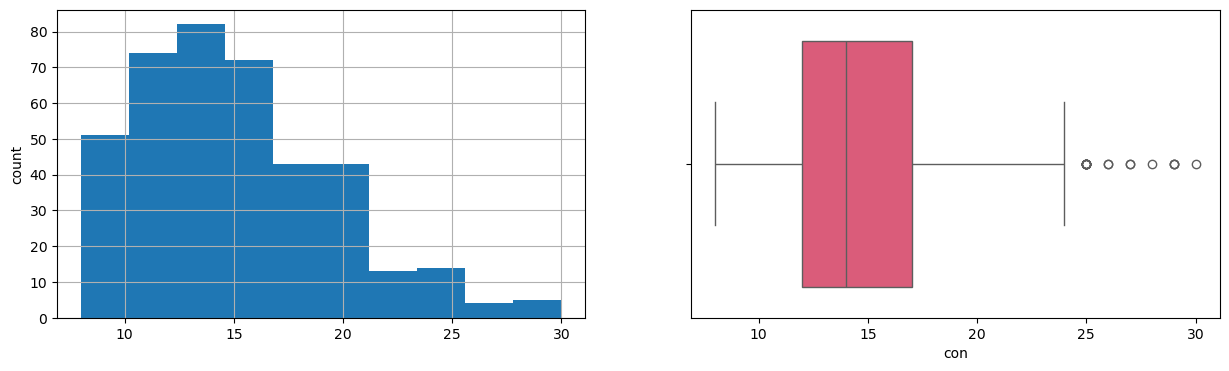

int
Skew : 0.46


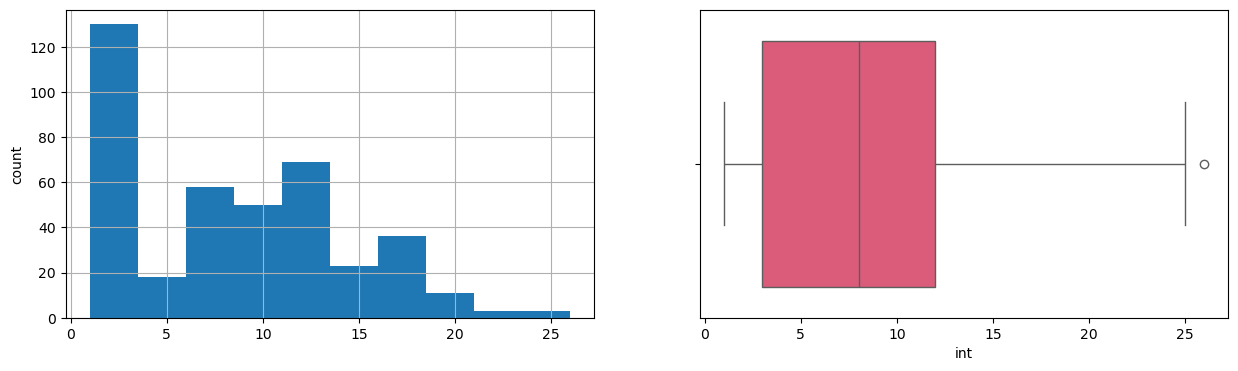

wis
Skew : 0.7


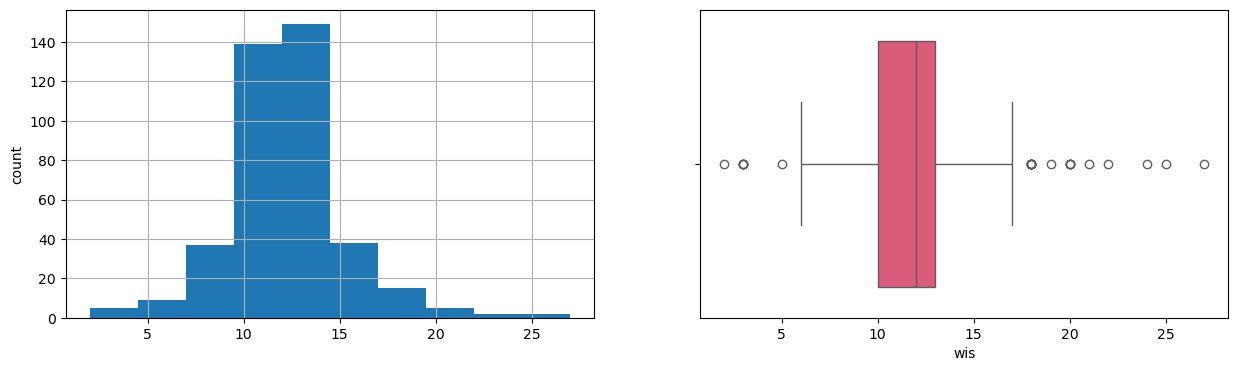

cha
Skew : 0.7


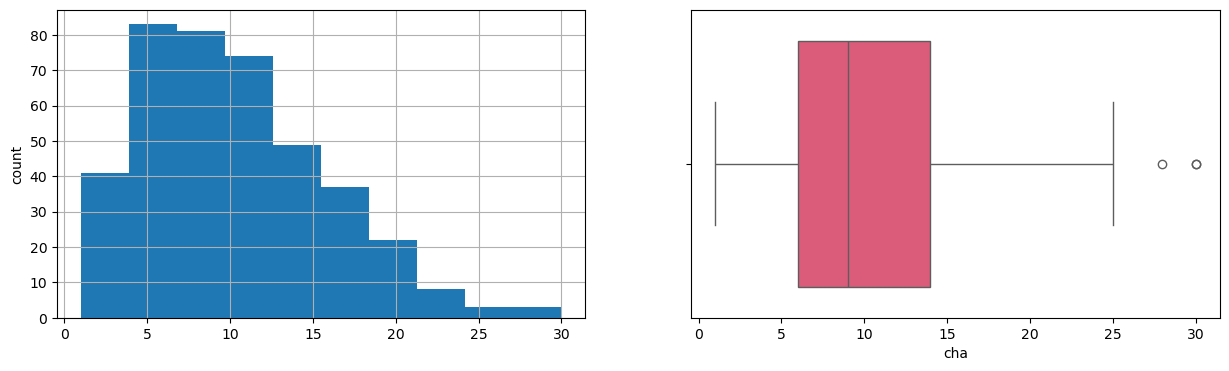

In [23]:



colors = sns.color_palette("hls",32)
for col in nonCat.columns:
    print(col)
    print('Skew :',round(nonCat[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    nonCat[col].hist(bins=10)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=nonCat[col],color='#EF476F')
    plt.show()

## Creating the Machine Learning Model

### Developing Code

In [24]:
dnd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 760
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cr      401 non-null    float64
 1   type    401 non-null    object 
 2   size    401 non-null    object 
 3   ac      401 non-null    int64  
 4   hp      401 non-null    int64  
 5   align   401 non-null    object 
 6   str     401 non-null    float64
 7   dex     401 non-null    float64
 8   con     401 non-null    float64
 9   int     401 non-null    float64
 10  wis     401 non-null    float64
 11  cha     401 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 40.7+ KB


#### Dummy Variables

In [25]:
dummyDf = pd.get_dummies(dnd,columns=['type','align','size'], drop_first=True) 

In [26]:
dummyDf

,cr,ac,hp,str,dex,con,int,wis,cha,type_beast,...,align_neutral,align_neutral evil,align_neutral good,align_neutral good,align_unaligned,size_Huge,size_Large,size_Medium,size_Small,size_Tiny
0,0.25,12,13,10.0,14.0,10.0,11.0,12.0,11.0,False,...,False,False,True,False,False,False,False,True,False,False
2,10.00,17,135,21.0,9.0,15.0,18.0,15.0,18.0,False,...,False,False,False,False,False,False,True,False,False,False
5,0.25,10,9,10.0,10.0,10.0,10.0,14.0,11.0,False,...,False,False,False,False,False,False,False,True,False,False
6,14.00,19,195,23.0,14.0,21.0,14.0,13.0,17.0,False,...,False,False,False,False,False,True,False,False,False,False
8,16.00,19,225,25.0,10.0,23.0,16.0,15.0,19.0,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,3.00,12,66,16.0,14.0,13.0,14.0,12.0,16.0,False,...,False,True,False,False,False,False,False,True,False,False
755,4.00,14,71,16.0,14.0,13.0,14.0,12.0,16.0,False,...,False,True,False,False,False,False,False,True,False,False
757,1.00,11,40,11.0,12.0,11.0,13.0,12.0,14.0,False,...,False,True,False,False,False,False,False,True,False,False
759,26.00,21,580,27.0,24.0,28.0,26.0,27.0,30.0,False,...,False,False,False,False,False,False,True,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn as sk

#### Splitting Data

In [28]:
X = dummyDf.drop(['cr'],axis=1)
Y = dummyDf['cr']

In [29]:

trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2, random_state = 123)

#### Making Model

In [30]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]
for val in n_estimators:
    score = cross_val_score(RandomForestRegressor(n_estimators= val, random_state= 42), X, Y, scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')
#Find optimal depth
n_depth = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
for val in n_depth:
    score = cross_val_score(RandomForestRegressor(n_estimators= 100, max_depth = val, random_state= 42), X, Y, scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(50): -1.588
Average score(100): -1.576
Average score(150): -1.567
Average score(200): -1.573
Average score(250): -1.573
Average score(300): -1.575
Average score(350): -1.580
Average score(2): -2.116
Average score(4): -1.632
Average score(6): -1.577
Average score(8): -1.577
Average score(10): -1.570
Average score(12): -1.573
Average score(14): -1.576
Average score(16): -1.577
Average score(18): -1.576
Average score(20): -1.576
Average score(22): -1.576
Average score(24): -1.576
Average score(26): -1.576
Average score(28): -1.576
Average score(30): -1.576


In [31]:
rfModel = RandomForestRegressor(n_estimators=250, random_state=42,max_depth=10)
rfModel.fit(trainX, trainY)

RandomForestRegressor(max_depth=10, n_estimators=250, random_state=42)

In [32]:
pred = rfModel.predict(testX)
pred


array([2.22275166e+00, 1.92760000e+01, 1.16485000e+01, 4.87387750e-01,
       1.72707646e+00, 1.97040000e+01, 3.21382081e+00, 5.32793231e+00,
       8.16823015e+00, 5.03299959e-01, 2.93928347e+00, 4.18126163e-01,
       8.46597297e+00, 4.82306896e+00, 1.02094822e+00, 1.69795355e-02,
       2.45526326e+00, 5.01967197e+00, 1.64692000e-02, 1.51120000e+01,
       1.71842714e+00, 4.90571506e-01, 1.09404364e+01, 2.00520000e+01,
       2.07000000e+01, 3.29875001e+00, 1.65800000e+01, 1.24150663e+00,
       1.11747225e+01, 1.60310387e+00, 1.08215372e-02, 1.64004971e+00,
       2.52993725e-01, 1.40797848e+00, 5.95421260e-01, 3.88936367e+00,
       9.65960958e-03, 1.34630000e+01, 2.12174611e-01, 5.20595827e+00,
       5.30127456e+00, 9.37544416e+00, 5.19633400e+00, 6.56754329e-02,
       5.14615958e-01, 1.61802694e-01, 1.70124679e+00, 5.98999434e+00,
       5.81271321e-01, 1.77788130e+00, 1.18922225e+01, 1.91160000e+01,
       3.49126667e+00, 1.33064000e+01, 2.57890465e-04, 2.37600000e+01,
      

In [58]:
mse = mean_squared_error(testY, pred)
print("Mean Squared Error: ",mse)

Mean Squared Error:  2.974818718402312


#### Plotting Residuals

In [34]:
import matplotlib.pyplot as plt

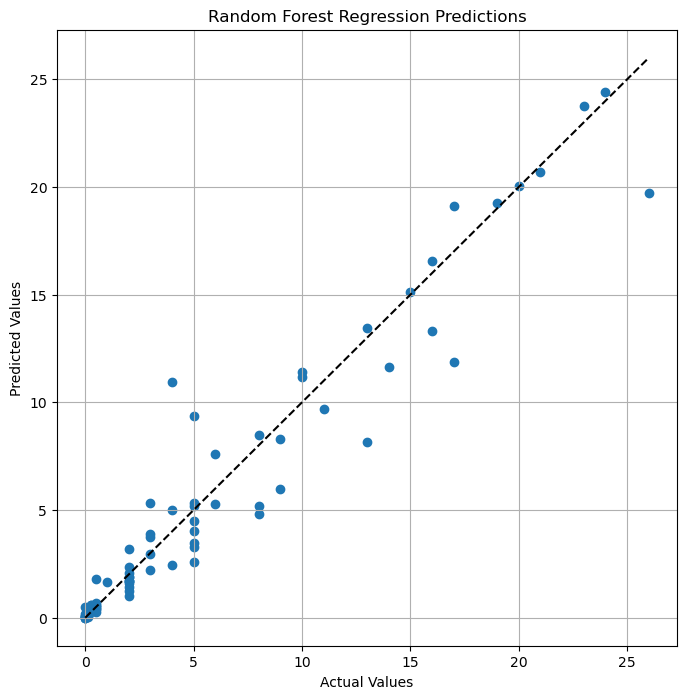

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(testY, pred)
plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', label='Perfect prediction line')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')
plt.grid()
plt.title('Random Forest Regression Predictions')
plt.savefig('reggression.png')
plt.show()


### First Iteration: Regular Resources

To understand what resources are being used for the control iteration, the psutil package has a way to check environments of a machine.

In [35]:
#!pip install psutil
import psutil

In [36]:
print("="*40, "CPU Info", "="*40)

print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

cpufreq = psutil.cpu_freq()
print(f"Max Frequency: {cpufreq.max:.2f}Mhz")
print(f"Min Frequency: {cpufreq.min:.2f}Mhz")
print(f"Current Frequency: {cpufreq.current:.2f}Mhz")

print("CPU Usage Per Core:")
for i, percentage in enumerate(psutil.cpu_percent(percpu=True, interval=1)):
    print(f"Core {i}: {percentage}%")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")

======================================== CPU Info ========================================
Physical cores: 4
Total cores: 8
Max Frequency: 1498.00Mhz
Min Frequency: 0.00Mhz
Current Frequency: 1498.00Mhz
CPU Usage Per Core:
Core 0: 45.5%
Core 1: 35.4%
Core 2: 41.5%
Core 3: 39.1%
Core 4: 48.4%
Core 5: 41.3%
Core 6: 33.8%
Core 7: 22.6%
Total CPU Usage: 36.1%


To test the implementation of this code against other resources, a continous code must be run and the results should be measured for both the MSE and the time it took to run the program.

In [37]:
import time

Mean Squared Error:  2.9748187184023114
Execution time: 2.2298169136047363 seconds
Total CPU Usage: 26.5%


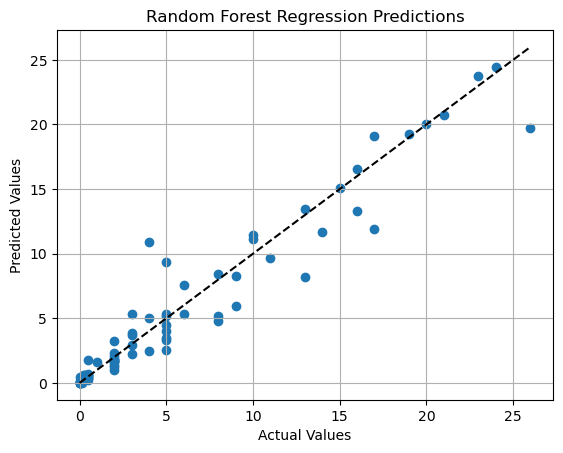

In [38]:
start = time.time()

X = dummyDf.drop(['cr'],axis=1)
Y = dummyDf['cr']

trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2, random_state = 123)


rfModel = RandomForestRegressor(n_estimators=250, random_state=42,max_depth=10)
rfModel.fit(trainX, trainY)

pred = rfModel.predict(testX)

print("Mean Squared Error: ",mean_squared_error(testY, pred))

plt.scatter(testY, pred)

plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', label='Perfect prediction line')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')
plt.grid()
plt.title('Random Forest Regression Predictions')

plt.savefig('normal.png')


end = time.time()
print(f"Execution time: {end - start} seconds")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")


In [39]:
Time1 = end-start
re1 = psutil.cpu_percent()

### Second Iteration: SKlearn Multi-Processing

According to the SKlearn documentation, it has a built in backend for controlling parallel processing jobs: "Joblib is able to support both multi-processing and multi-threading. Whether joblib chooses to spawn a thread or a process depends on the backend that it’s using."



#### Threading

In [40]:
from joblib import parallel_backend

Mean Squared Error:  2.9748187184023114
Execution time: 1.758258581161499 seconds
Total CPU Usage: 30.7%


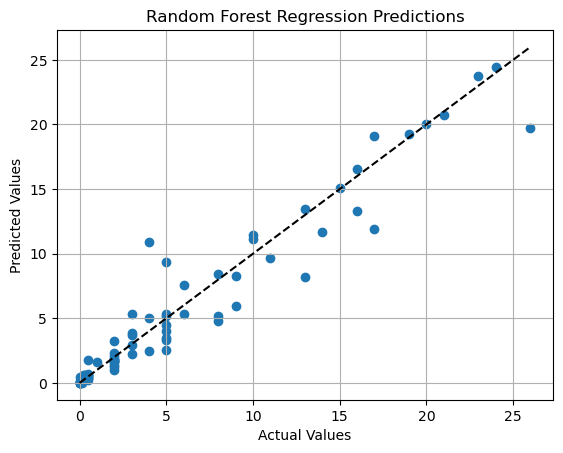

In [44]:
start = time.time()
with parallel_backend('threading', n_jobs=2):

    X = dummyDf.drop(['cr'],axis=1)
    Y = dummyDf['cr']

    
    trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2, random_state = 123)

    rfModel = RandomForestRegressor(n_estimators=250, random_state=42,max_depth=10)
    rfModel.fit(trainX, trainY)

    pred = rfModel.predict(testX)

    print("Mean Squared Error: ",mean_squared_error(testY, pred))


    plt.scatter(testY, pred)

    plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', label='Perfect prediction line')

    plt.xlabel('Actual Values')
    plt.grid()

    plt.ylabel('Predicted Values')

    plt.title('Random Forest Regression Predictions')

    plt.savefig('threading.png')
    
end = time.time()

print(f"Execution time: {end - start} seconds")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")


In [42]:
Time2 = end-start
re2 = psutil.cpu_percent()

#### Multiprocessing

Mean Squared Error:  2.974818718402312
Execution time: 3.9905037879943848 seconds
Total CPU Usage: 30.8%


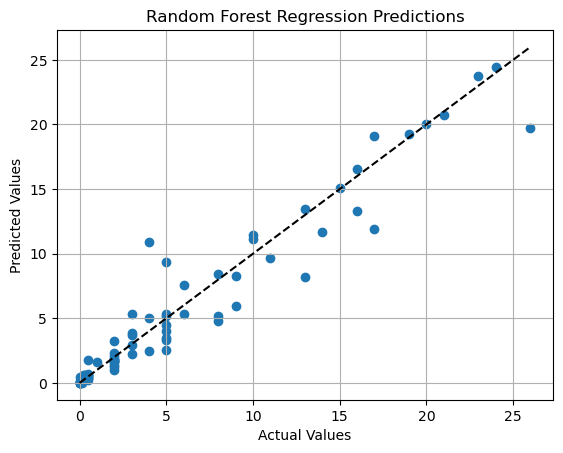

In [45]:
start = time.time()
with parallel_backend('multiprocessing', n_jobs=2):

    X = dummyDf.drop(['cr'],axis=1)
    Y = dummyDf['cr']

    
    trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2, random_state = 123)

    rfModel = RandomForestRegressor(n_estimators=250, random_state=42,max_depth=10)
    rfModel.fit(trainX, trainY)

    pred = rfModel.predict(testX)

    print("Mean Squared Error: ",mean_squared_error(testY, pred))


    plt.scatter(testY, pred)

    plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', label='Perfect prediction line')

    plt.xlabel('Actual Values')
    plt.grid()

    plt.ylabel('Predicted Values')

    plt.title('Random Forest Regression Predictions')

    plt.savefig('multiprocessing.png')

    
end = time.time()
print(f"Execution time: {end - start} seconds")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")


In [46]:
Time3 = end-start
re3 = psutil.cpu_percent()

### Third Iteration: Resource Alocation

The third way to test how execution time of the regression model is affected by parameters is through using a different machine. For the machine, for this section, ptolemy cluster from Mississippi State High Performance Computing Center will be used. A slurm file will be created in this notebook listing parameters.

#### Single Core

First, the script needs to be downloaded into a python file, along with the updated dataset.

In [30]:
dummyDf.to_csv('monstersNew.csv', index=False)
print("new dataset created")

new dataset created


In [7]:
%%writefile reggression1.py

#libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psutil
import time


dummyDf = pd.read_csv('/scratch/ptolemy/users/rnt89/FinalProject/monstersNew.csv')
start = time.time()

X = dummyDf.drop(['cr'],axis=1)
Y = dummyDf['cr']

trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2, random_state = 123)


rfModel = RandomForestRegressor(n_estimators=250, random_state=42,max_depth=10)
rfModel.fit(trainX, trainY)

pred = rfModel.predict(testX)

print("Mean Squared Error: ",mean_squared_error(testY, pred))

plt.scatter(testY, pred)

plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', label='Perfect prediction line')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')
plt.grid()
plt.title('Random Forest Regression Predictions')
plt.savefig('singleCore.png')


end = time.time()
print(f"Execution time: {end - start} seconds")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")


Overwriting reggression1.py


In [6]:
%%writefile SingleCore.slurm
#!/bin/bash
#SBATCH --job-name=SingleCore
#SBATCH --nodes=1
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=1
#SBATCH --partition=gpu-a100
#SBATCH --gres=gpu:a100_1g.10gb:1
#SBATCH --mem=32G
#SBATCH --time=2:00:00
#SBATCH --output=output-%j.out
#SBATCH --error=error-%j.out
#SBATCH -A class-dsci2022

# Load modules
module load python/3.10.8
ml miniconda3/24.3.0
# Activate your Python environment if needed
source activate lab_env

# Run the Python script
python reggression1.py


Overwriting SingleCore.slurm


The job is then run using the terminal script given here:

**Written in terminal:**

<span style="background-color: lightgrey;">ssh [username]</span>

<span style="background-color: lightgrey;">cd /scratch/ptolemy/users/rnt89/FinalProject</span>

<span style="background-color: lightgrey;">sbatch SingleCore.slurm</span>


Seeing Results:

In [10]:
with open('output-28712.out', 'r') as f:
    file_contents = f.read()
print(file_contents)

Mean Squared Error:  2.9748187184023114
Execution time: 0.6713390350341797 seconds
Total CPU Usage: 0.5%



#### Multi Core

Creating a new slurm file that has the parameter of it being a multi core job:

In [8]:
%%writefile reggression2.py

#libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psutil
import time


dummyDf = pd.read_csv('/scratch/ptolemy/users/rnt89/FinalProject/monstersNew.csv')
start = time.time()

X = dummyDf.drop(['cr'],axis=1)
Y = dummyDf['cr']

trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2, random_state = 123)


rfModel = RandomForestRegressor(n_estimators=250, random_state=42,max_depth=10)
rfModel.fit(trainX, trainY)

pred = rfModel.predict(testX)

print("Mean Squared Error: ",mean_squared_error(testY, pred))

plt.scatter(testY, pred)

plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', label='Perfect prediction line')

plt.xlabel('Actual Values')

plt.ylabel('Predicted Values')
plt.grid()
plt.title('Random Forest Regression Predictions')
plt.savefig('multiCore.png')


end = time.time()
print(f"Execution time: {end - start} seconds")
print(f"Total CPU Usage: {psutil.cpu_percent()}%")


Writing reggression2.py


In [9]:
%%writefile MultiCore.slurm
#!/bin/bash
#SBATCH --job-name=SingleCore
#SBATCH --nodes=2
#SBATCH --ntasks=2
#SBATCH --cpus-per-task=8
#SBATCH --partition=gpu-a100
#SBATCH --gres=gpu:a100_1g.10gb:1
#SBATCH --mem=32G
#SBATCH --time=2:00:00
#SBATCH --output=output-%j.out
#SBATCH --error=error-%j.out
#SBATCH -A class-dsci2022

# Load modules
module load python/3.10.8
ml miniconda3/24.3.0
# Activate your Python environment if needed
source activate lab_env

# Run the Python script
python reggression2.py


Overwriting MultiCore.slurm


The terminal script to run the multiCore job:

**Written in terminal:**

<span style="background-color: lightgrey;">ssh [username]</span>

<span style="background-color: lightgrey;">cd /scratch/ptolemy/users/rnt89/FinalProject</span>

<span style="background-color: lightgrey;">sbatch MultiCore.slurm</span>


Seeing Results: 

In [11]:
with open('output-28713.out', 'r') as f:
    file_contents = f.read()
print(file_contents)

Mean Squared Error:  2.9748187184023114
Execution time: 0.4283304214477539 seconds
Total CPU Usage: 0.8%



## Evalutation and Results

For better comparison, visualizations and a table will be made of the results. 

In [48]:
results = {'TestName': ['Normal', 'MultiThreading', 'MultiProcessing','SingleCore','MultiCore'], 'TestTime': [Time1, Time2, Time3,0.6713390350341797,0.4283304214477539],'TestResources':[re1,re2,re3,0.8,0.8]}
resultsDf = pd.DataFrame(results)

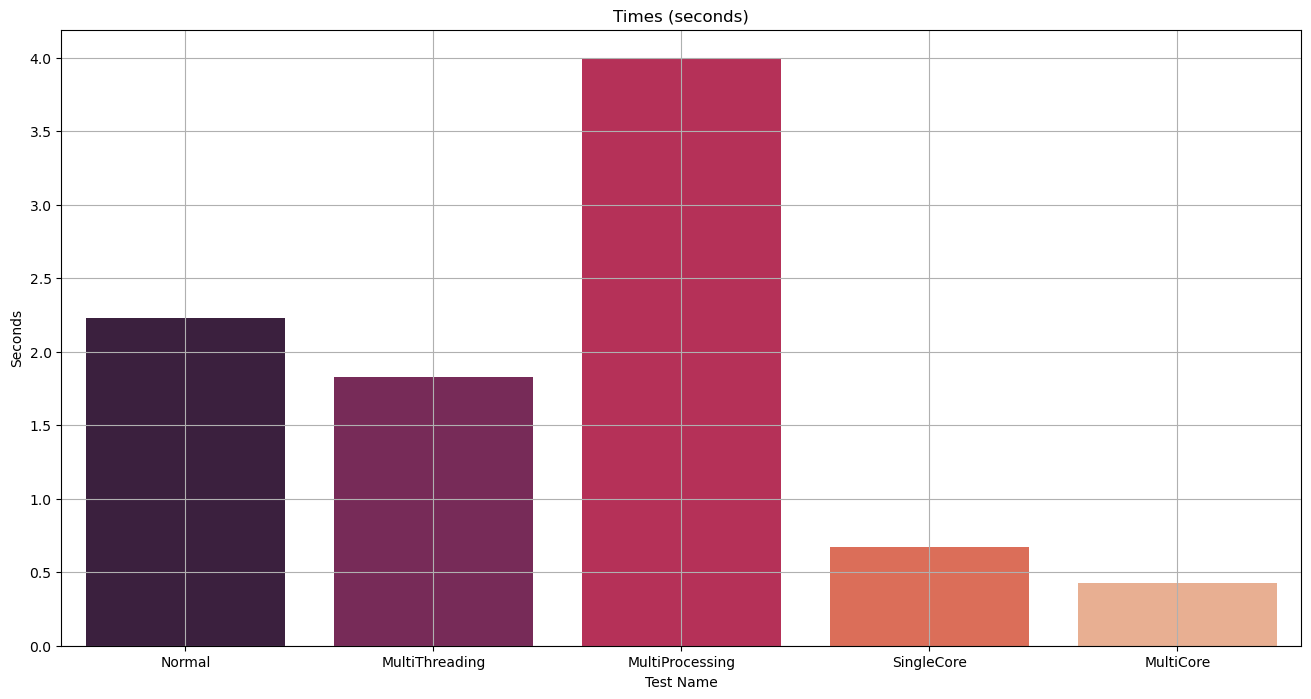

In [49]:
plt.figure(figsize=(16,8))
palette = sns.color_palette("rocket",5)
sns.barplot(x=resultsDf['TestName'], y=resultsDf['TestTime'],hue=resultsDf['TestName'],palette=palette)
plt.grid(True)
plt.title('Times (seconds)')
plt.xticks(wrap=True,fontsize=10)
plt.xlabel('Test Name')
plt.ylabel('Seconds')
plt.show()

In [51]:
resultsDf

,TestName,TestTime,TestResources
0,Normal,2.229817,22.6
1,MultiThreading,1.825938,26.9
2,MultiProcessing,3.990504,24.1
3,SingleCore,0.671339,0.8
4,MultiCore,0.428330,0.8


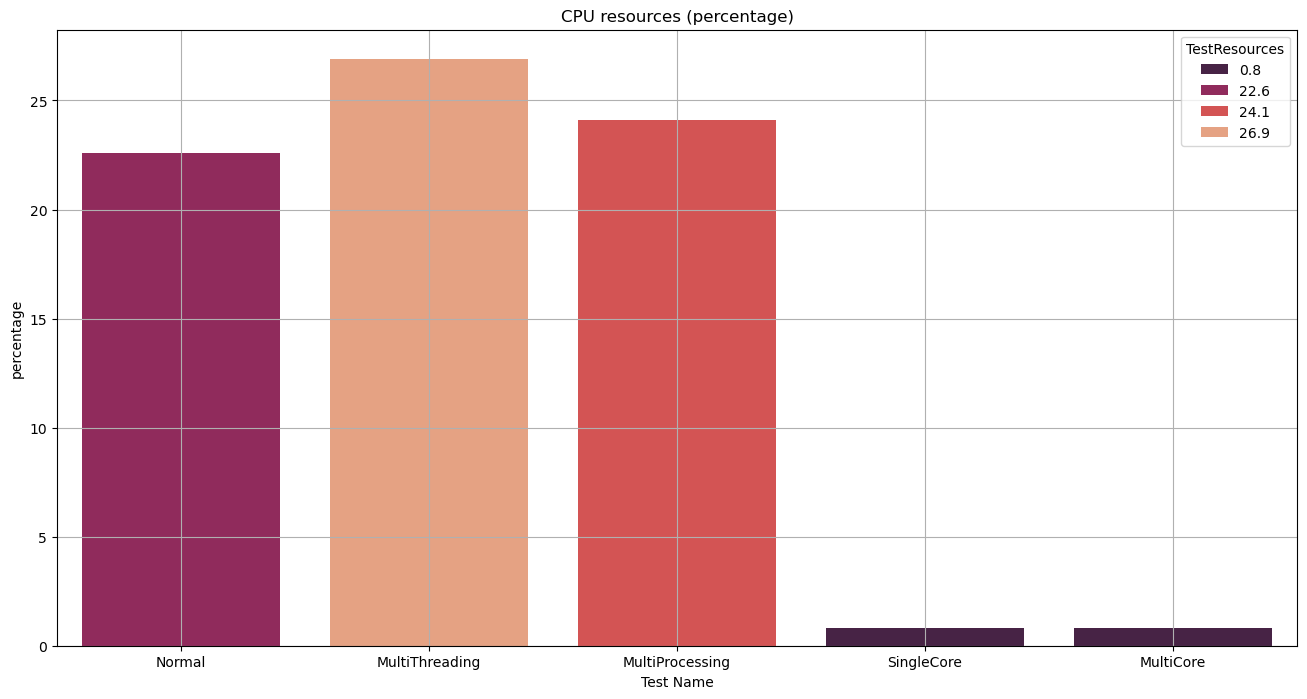

In [50]:
plt.figure(figsize=(16,8))
palette = sns.color_palette("rocket",4)
sns.barplot(x=resultsDf['TestName'], y=resultsDf['TestResources'],hue=resultsDf['TestResources'],palette= palette)
plt.grid(True)
plt.title('CPU resources (percentage)')
plt.xticks(wrap=True,fontsize=10)
plt.xlabel('Test Name')
plt.ylabel('percentage')
plt.show()